# Exploratory Data Analysis on Loan Default

Data set location: https://www.kaggle.com/datasets/yasserh/loan-default-dataset

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/content/')

Mounted at /content/content/


In [3]:
pd.options.display.max_columns = None # display all columns
pd.options.display.max_rows = None    # display all rows

## Import data

In [4]:
org_path = '/content/content/MyDrive/portfolio_projects/loan_default_yt/'
app_data = 'application_data.csv'
app = pd.read_csv(org_path + app_data)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Feature selection

In [5]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
app.shape

(307511, 122)

In [7]:
misg_info = pd.DataFrame(app.isnull().sum().sort_values(ascending=False)).reset_index()
misg_info.rename(columns={'index':'col_name', 0:'null_counts'}, inplace=True)
misg_info.head()

,col_name,null_counts
0,COMMONAREA_MEDI,214865
1,COMMONAREA_AVG,214865
2,COMMONAREA_MODE,214865
3,NONLIVINGAPARTMENTS_MODE,213514
4,NONLIVINGAPARTMENTS_AVG,213514


In [8]:
misg_info['null_pct'] = np.round(misg_info.null_counts / app.shape[0] * 100, 2)
misg_info.to_excel(org_path + "missing_info.xlsx", index=False)
misg_info.head()

,col_name,null_counts,null_pct
0,COMMONAREA_MEDI,214865,69.87
1,COMMONAREA_AVG,214865,69.87
2,COMMONAREA_MODE,214865,69.87
3,NONLIVINGAPARTMENTS_MODE,213514,69.43
4,NONLIVINGAPARTMENTS_AVG,213514,69.43


In [9]:
misg_cols = misg_info[misg_info.null_pct >= 40].col_name.to_list()
app_misg_rmvd = app.drop(labels=misg_cols, axis=1)
app_misg_rmvd.shape

(307511, 73)

In [10]:
app_misg_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
flag_cols = [flag for flag in app_misg_rmvd.columns if flag.startswith("FLAG_")]
len(flag_cols)

28

In [12]:
app_misg_rmvd[flag_cols].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
flg_tgt = app_misg_rmvd[flag_cols+["TARGET"]]
flg_tgt.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='FLAG_DOCUMENT_19', ylabel='count'>

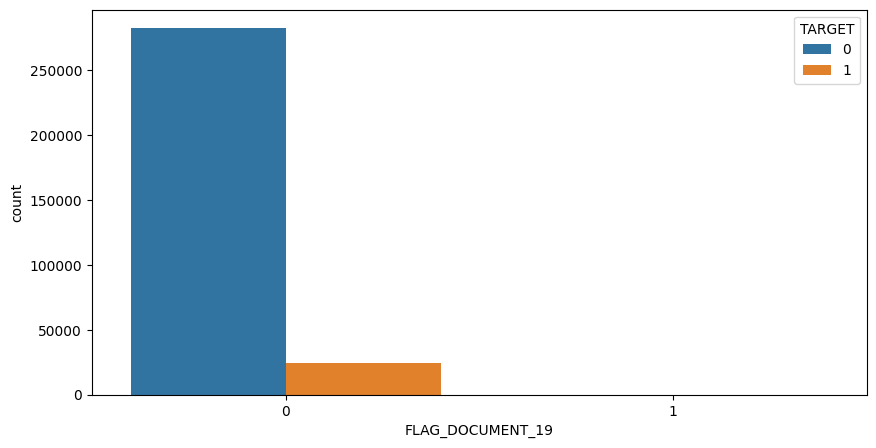

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=flg_tgt, x='FLAG_DOCUMENT_19', hue='TARGET')

The customers who did not submit document 19 are almost "not defaulter" (TARGET = 0).

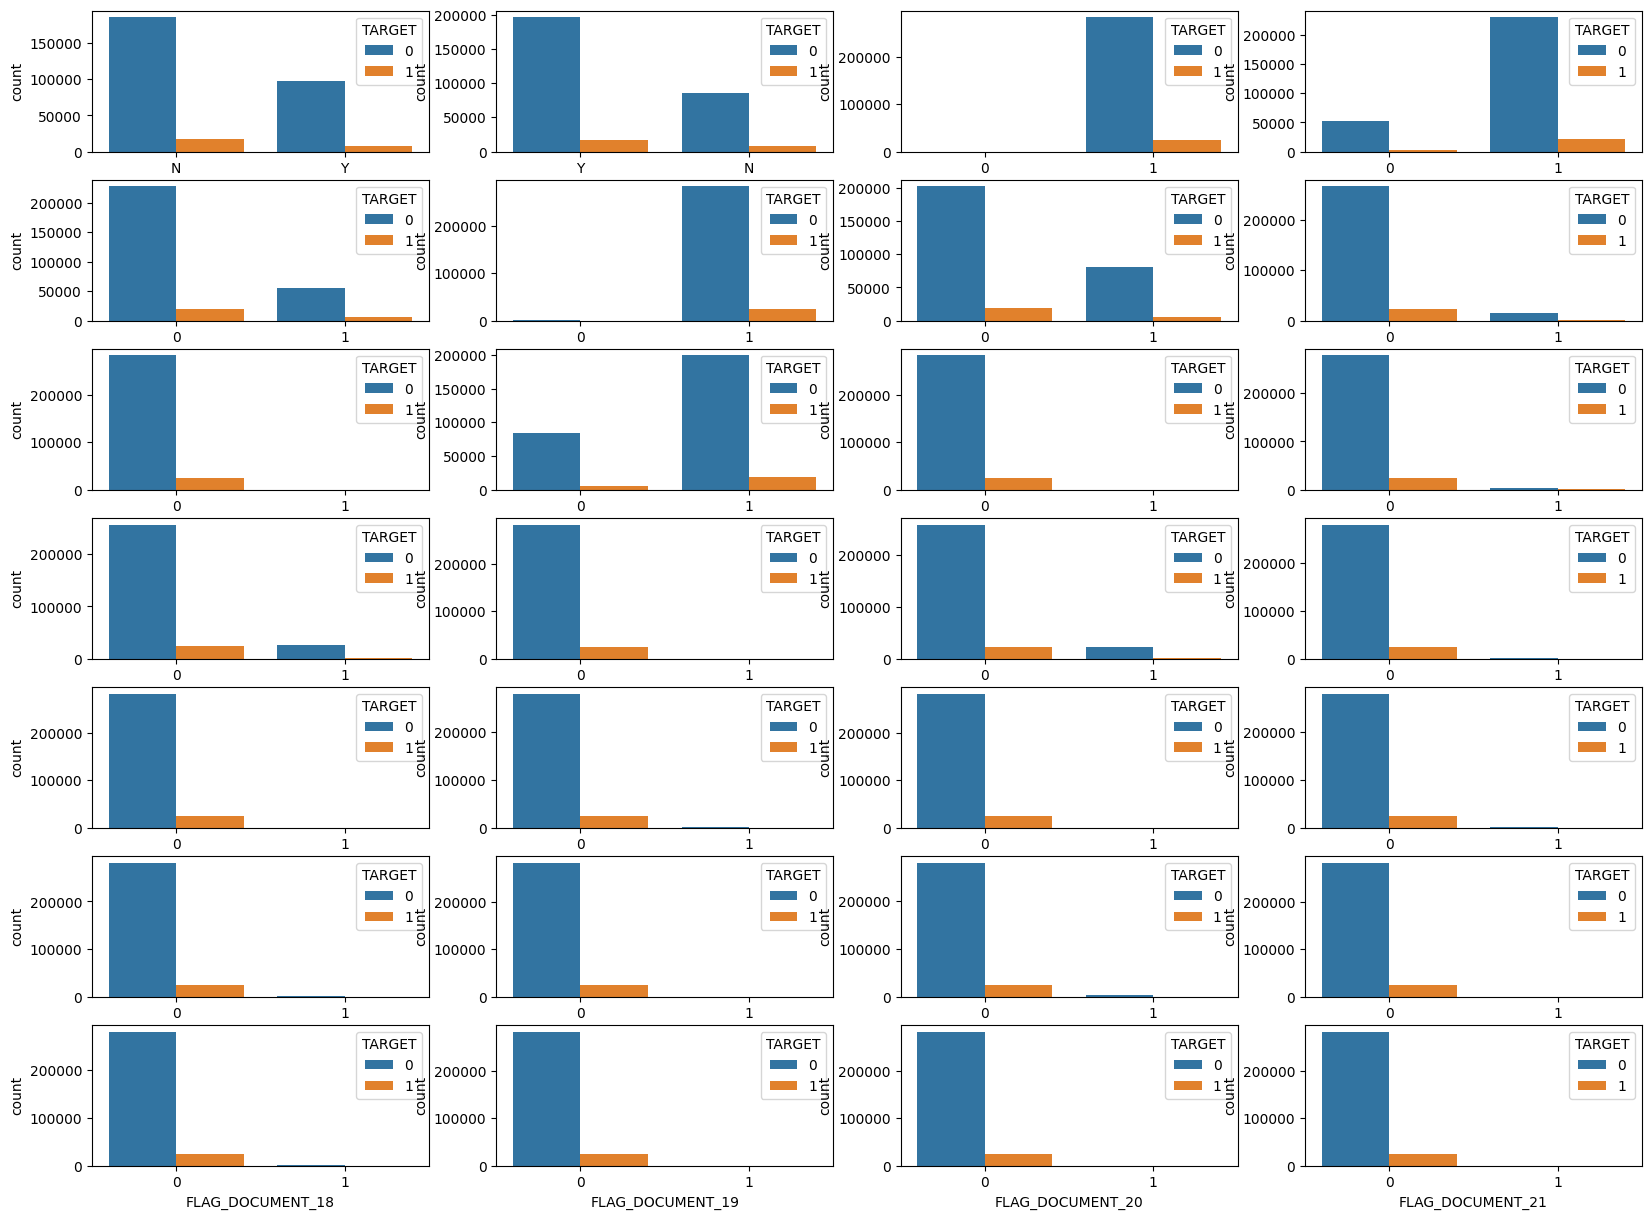

In [15]:
plt.figure(figsize=(20,15))
for i, col in enumerate(flag_cols):
    plt.subplot(7, 4, i+1)
    sns.countplot(data=flg_tgt, x=col, hue='TARGET')

In [16]:
flag_corr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
             'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']
flag_corr_df = app_misg_rmvd[flag_corr]
flag_corr_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,N,Y,1,1,0,1,1,0,1
1,N,N,1,1,0,1,1,0,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,0,0
4,N,Y,1,1,0,1,0,0,0


In [17]:
flag_corr_df.groupby('FLAG_OWN_CAR').size()

,0
FLAG_OWN_CAR,
N,202924
Y,104587


In [18]:
flag_corr_df['FLAG_OWN_CAR'].replace({'Y':1, "N":0}, inplace=True)
flag_corr_df['FLAG_OWN_REALTY'].replace({'Y':1, "N":0}, inplace=True)

<ipython-input-18-227592d78474>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flag_corr_df['FLAG_OWN_CAR'].replace({'Y':1, "N":0}, inplace=True)
<ipython-input-18-227592d78474>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flag_corr_df['FLAG_OWN_CAR'].replace({'Y':1, "N":0}, inplace=True)
<ipy

In [19]:
corr_df = round(flag_corr_df.corr(), 2)
corr_df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
FLAG_OWN_CAR,1.00,-0.00,-0.0,0.15,0.01,-0.01,-0.01,0.03,-0.02
FLAG_OWN_REALTY,-0.00,1.00,-0.0,-0.07,-0.11,0.01,-0.04,0.03,-0.01
FLAG_MOBIL,-0.00,-0.00,1.0,-0.00,0.00,-0.00,0.00,0.00,0.00
FLAG_EMP_PHONE,0.15,-0.07,-0.0,1.00,0.23,-0.01,-0.02,0.06,0.05
FLAG_WORK_PHONE,0.01,-0.11,0.0,0.23,1.00,0.02,0.29,-0.01,0.03
FLAG_CONT_MOBILE,-0.01,0.01,-0.0,-0.01,0.02,1.00,0.01,-0.01,0.00
FLAG_PHONE,-0.01,-0.04,0.0,-0.02,0.29,0.01,1.00,0.01,-0.02
FLAG_EMAIL,0.03,0.03,0.0,0.06,-0.01,-0.01,0.01,1.00,-0.00
TARGET,-0.02,-0.01,0.0,0.05,0.03,0.00,-0.02,-0.00,1.00


<Axes: >

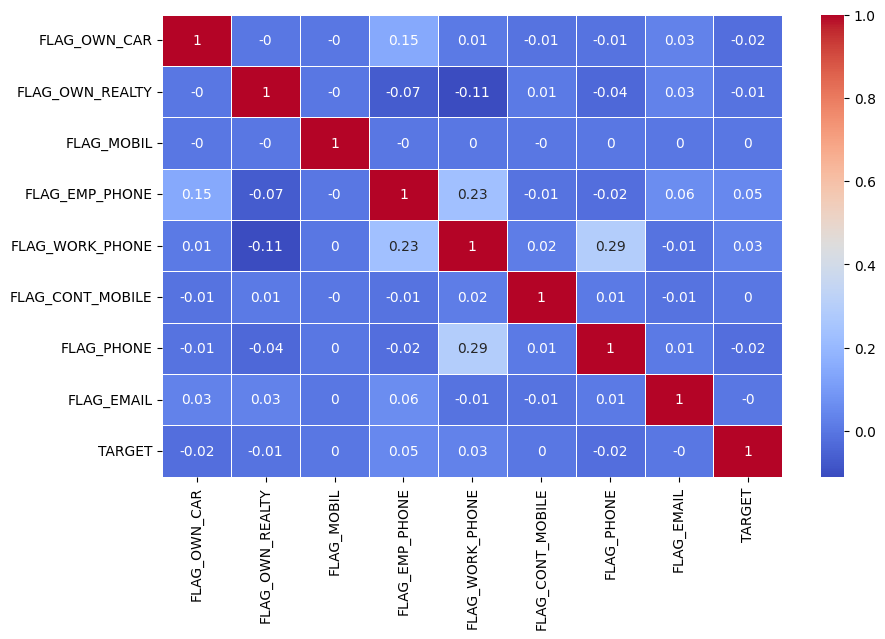

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_df, cmap='coolwarm', linewidth=.5, annot=True)

Correlation coefficient values __less__ than `+0.8` or __greater__ than `-0.8` are not considered **_significant_**.  

All columns seem not correlated with the "TARGET" column. We will remove from the data frame.

In [21]:
app_flag_rmvd = app_misg_rmvd.drop(labels=flag_cols, axis=1)

In [22]:
app_flag_rmvd.shape

(307511, 45)

In [23]:
app_flag_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

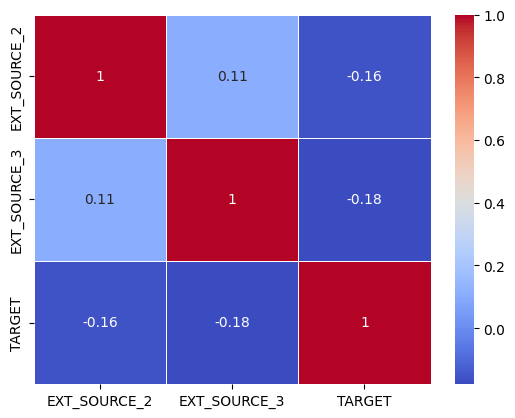

In [24]:
sns.heatmap(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(), annot=True,
            cmap='coolwarm', linewidth=.5)

In [25]:
app_score_col_rmvd = app_flag_rmvd.drop(['EXT_SOURCE_2','EXT_SOURCE_3'], axis=1)

In [26]:
app_score_col_rmvd.shape

(307511, 43)

## Feature Engineering

In [27]:
app_score_col_rmvd.isnull().sum().sort_values() / app_score_col_rmvd.shape[0]

,0
SK_ID_CURR,0.000000
ORGANIZATION_TYPE,0.000000
LIVE_CITY_NOT_WORK_CITY,0.000000
REG_CITY_NOT_WORK_CITY,0.000000
REG_CITY_NOT_LIVE_CITY,0.000000
LIVE_REGION_NOT_WORK_REGION,0.000000
REG_REGION_NOT_WORK_REGION,0.000000
REG_REGION_NOT_LIVE_REGION,0.000000
HOUR_APPR_PROCESS_START,0.000000
WEEKDAY_APPR_PROCESS_START,0.000000


### Missing imputation

In [28]:
app_score_col_rmvd.groupby('CNT_FAM_MEMBERS').size()

,0
CNT_FAM_MEMBERS,
1.0,67847
2.0,158357
3.0,52601
4.0,24697
5.0,3478
6.0,408
7.0,81
8.0,20
9.0,6


In [29]:
max_count = app_score_col_rmvd.CNT_FAM_MEMBERS.mode()[0]
max_count

2.0

In [30]:
app_score_col_rmvd['CNT_FAM_MEMBERS'] = app_score_col_rmvd['CNT_FAM_MEMBERS'].fillna(value=max_count)

In [31]:
app_score_col_rmvd.CNT_FAM_MEMBERS.isnull().sum()

0

In [32]:
app_score_col_rmvd.groupby('OCCUPATION_TYPE').size()

,0
OCCUPATION_TYPE,
Accountants,9813
Cleaning staff,4653
Cooking staff,5946
Core staff,27570
Drivers,18603
HR staff,563
High skill tech staff,11380
IT staff,526
Laborers,55186


`AMT_ANNUITY` column မှာ  string တွေရောပါနေလို့ Number ပြောင်းပြီး string နေရာမှာ NaN ထည့်လိုက်တာ

In [33]:
app_score_col_rmvd['AMT_ANNUITY'] = pd.to_numeric(app_score_col_rmvd['AMT_ANNUITY'], errors='coerce')

- `Object type` နဲ့ `Integer column` တွေဆို **_mode_** ကိုထည့်တာအကောင်းဆုံး
- `Float` column တွေဆို **_mean_** ကိုထည့်တာအကောင်းဆုံး

In [34]:
cols_to_impute = ['CNT_FAM_MEMBERS','OCCUPATION_TYPE','NAME_TYPE_SUITE','AMT_ANNUITY']
impute_col_types = ['I','O','O','F']

for col, type_ in zip(cols_to_impute, impute_col_types):
  print("Column name:", col, "\n***************************")

  if (type_ == 'I') | (type_ == 'O'):
    display(app_score_col_rmvd.groupby(col).size())
    value = app_score_col_rmvd[col].mode()[0]

  elif type_ == 'F':
    print("Standard deviation:", app_score_col_rmvd[col].std())
    value = app_score_col_rmvd[col].mean()

  app_score_col_rmvd[col] = app_score_col_rmvd[col].fillna(value)
  display("\nNull count:", app_score_col_rmvd[col].isnull().sum())

Column name: CNT_FAM_MEMBERS 
***************************


,0
CNT_FAM_MEMBERS,
1.0,67847
2.0,158359
3.0,52601
4.0,24697
5.0,3478
6.0,408
7.0,81
8.0,20
9.0,6


'\nNull count:'

0

Column name: OCCUPATION_TYPE 
***************************


,0
OCCUPATION_TYPE,
Accountants,9813
Cleaning staff,4653
Cooking staff,5946
Core staff,27570
Drivers,18603
HR staff,563
High skill tech staff,11380
IT staff,526
Laborers,55186


'\nNull count:'

0

Column name: NAME_TYPE_SUITE 
***************************


,0
NAME_TYPE_SUITE,
Children,3267
Family,40149
Group of people,271
Other_A,866
Other_B,1770
"Spouse, partner",11370
Unaccompanied,248526


'\nNull count:'

0

Column name: AMT_ANNUITY 
***************************
Standard deviation: 14493.737315117392


'\nNull count:'

0

In [35]:
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
AMT_REQ_CREDIT_BUREAU_HOUR,265992.0,0.006402,0.083849,0.0,0.0,0.0,0.0,4.0


In [36]:
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [37]:
amt_r_cred = app_score_col_rmvd.filter(like='AMT_REQ_CREDIT_BUREAU').columns
amt_r_cred

Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [38]:
for col in amt_r_cred:
  value = app_score_col_rmvd[col].median()
  app_score_col_rmvd[col] = app_score_col_rmvd[col].fillna(value)
  print("Missing value:", app_score_col_rmvd[col].isnull().sum())

Missing value: 0
Missing value: 0
Missing value: 0
Missing value: 0
Missing value: 0
Missing value: 0


In [39]:
app_score_col_rmvd['AMT_GOODS_PRICE'].agg({'MEAN':'mean','MIN':'min',
                                           'MAX':'max','MEDIAN':'median'})

,AMT_GOODS_PRICE
MEAN,5.383962e+05
MIN,4.050000e+04
MAX,4.050000e+06
MEDIAN,4.500000e+05


`median` နဲ့ `max` ကြားမှာ အရမ်းကွာနေတဲ့အတွက် **_outlier_** တွေရှိကြောင်းသိနိုင်ပါတယ်။ ဒါကြောင့် `median` ကိုသာ impute လုပ်ပါမယ်။

In [40]:
value = app_score_col_rmvd['AMT_GOODS_PRICE'].median()
app_score_col_rmvd['AMT_GOODS_PRICE'] = app_score_col_rmvd['AMT_GOODS_PRICE'].fillna(value)
app_score_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

### Value modification

In [41]:
# Change negative values of "DAYS_" columns to absolute values
day_cols = app_score_col_rmvd.filter(like='DAYS').columns

for col in day_cols:
  app_score_col_rmvd[col] = abs(app_score_col_rmvd[col])

In [42]:
app_score_col_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
app_score_col_rmvd.nunique().sort_values()

,0
LIVE_REGION_NOT_WORK_REGION,2
TARGET,2
NAME_CONTRACT_TYPE,2
REG_REGION_NOT_LIVE_REGION,2
REG_CITY_NOT_LIVE_CITY,2
REG_CITY_NOT_WORK_CITY,2
LIVE_CITY_NOT_WORK_CITY,2
REG_REGION_NOT_WORK_REGION,2
REGION_RATING_CLIENT_W_CITY,3
REGION_RATING_CLIENT,3


In [44]:
app_score_col_rmvd.OBS_30_CNT_SOCIAL_CIRCLE.unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

### Outlier detection & treatment

In [45]:
columns = ['AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'DAYS_LAST_PHONE_CHANGE',
           'AMT_CREDIT', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'AMT_ANNUITY',
           'DAYS_REGISTRATION', 'DAYS_BIRTH', 'SK_ID_CURR']

app_score_col_rmvd[columns].agg(['min','max','median']).T

,min,max,median
AMT_GOODS_PRICE,40500.0,4050000.0,450000.0
AMT_INCOME_TOTAL,25650.0,117000000.0,147150.0
DAYS_LAST_PHONE_CHANGE,0.0,4292.0,757.0
AMT_CREDIT,45000.0,4050000.0,513531.0
DAYS_ID_PUBLISH,0.0,7197.0,3254.0
DAYS_EMPLOYED,0.0,365243.0,2219.0
AMT_ANNUITY,1615.5,258025.5,24903.0
DAYS_REGISTRATION,0.0,24672.0,4504.0
DAYS_BIRTH,7489.0,25229.0,15750.0
SK_ID_CURR,100002.0,456255.0,278202.0


<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

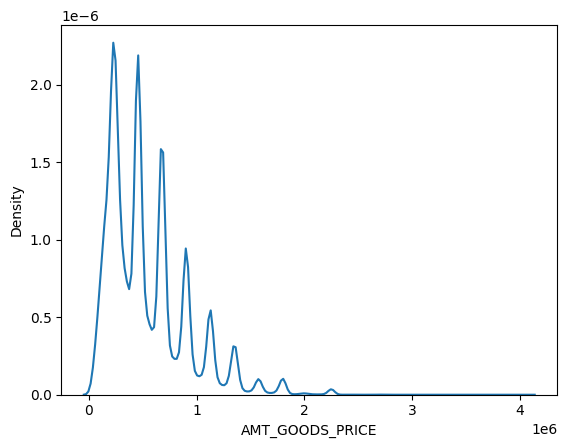

In [46]:
sns.kdeplot(data=app_score_col_rmvd, x='AMT_GOODS_PRICE')
# sns.histplot(data=app_score_col_rmvd, x='AMT_GOODS_PRICE')

<Axes: xlabel='AMT_GOODS_PRICE'>

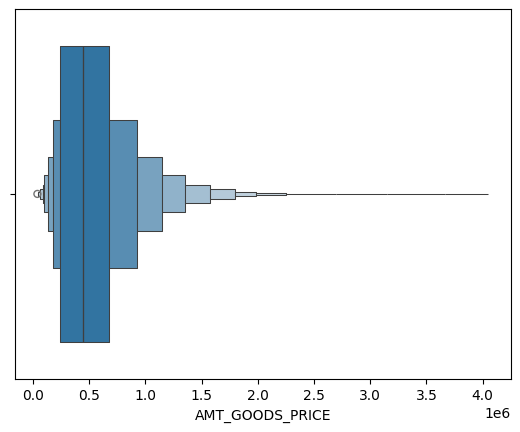

In [47]:
sns.boxenplot(data=app_score_col_rmvd, x='AMT_GOODS_PRICE')

<Axes: xlabel='AMT_GOODS_PRICE'>

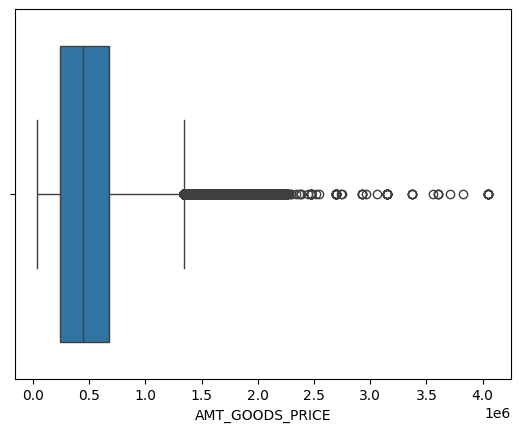

In [48]:
sns.boxplot(data=app_score_col_rmvd, x='AMT_GOODS_PRICE')

In [49]:
app_score_col_rmvd['AMT_GOODS_PRICE'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,AMT_GOODS_PRICE
0.10,180000.0
0.20,225000.0
0.30,270000.0
0.40,378000.0
0.50,450000.0
0.60,522000.0
0.70,675000.0
0.80,814500.0
0.90,1093500.0
0.99,1800000.0


Even 99% tile value cannot get maximum value (4050000) of the `AMT_GOODS_PRICE`, which means it is sure the outlier.

`AMT_GOODS_PRICE` column

In [50]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
labels = ['0-100K','100K-200K','200K-300K','300K-400K','400K-500K','500K-600K',
          '600K-700K','700K-800K','800K-900K','Above 900K']
app_score_col_rmvd['AMT_GOODS_PRICE_RANGES'] = pd.cut(app_score_col_rmvd['AMT_GOODS_PRICE'],
                                                      bins=bins, labels=labels)

In [51]:
app_score_col_rmvd.groupby('AMT_GOODS_PRICE_RANGES').size()

<ipython-input-51-b673fa1dde09>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby('AMT_GOODS_PRICE_RANGES').size()


,0
AMT_GOODS_PRICE_RANGES,
0-100K,8709
100K-200K,32956
200K-300K,62761
300K-400K,21219
400K-500K,57251
500K-600K,13117
600K-700K,40024
700K-800K,8110
800K-900K,21484


`AMT_INCOME_TOTAL` column

In [52]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,AMT_INCOME_TOTAL
0.10,81000.0
0.20,99000.0
0.30,112500.0
0.40,135000.0
0.50,147150.0
0.60,162000.0
0.70,180000.0
0.80,225000.0
0.90,270000.0
0.99,472500.0


In [53]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
labels = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K',
          '350K-400K','Above 400K']
app_score_col_rmvd['AMT_INCOME_TOTAL_RANGES'] = pd.cut(app_score_col_rmvd['AMT_INCOME_TOTAL'],
                                                      bins=bins, labels=labels)
app_score_col_rmvd.groupby('AMT_INCOME_TOTAL_RANGES').size()

<ipython-input-53-8284d253fcfb>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby('AMT_INCOME_TOTAL_RANGES').size()


,0
AMT_INCOME_TOTAL_RANGES,
0-100K,63698
100K-150K,91591
150K-200K,64307
200K-250K,48137
250K-300K,17039
300K-350K,8874
350K-400K,5802
Above 400K,8063


`AMT_CREDIT` column

In [54]:
app_score_col_rmvd['AMT_CREDIT'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,AMT_CREDIT
0.10,180000.0
0.20,254700.0
0.30,306306.0
0.40,432000.0
0.50,513531.0
0.60,604152.0
0.70,755190.0
0.80,900000.0
0.90,1133748.0
0.99,1854000.0


In [55]:
bins = [0,200000,400000,600000,800000,900000,1000000, 4050000]
labels = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','Above 1M']
app_score_col_rmvd['AMT_CREDIT_RANGES'] = pd.cut(app_score_col_rmvd['AMT_CREDIT'],
                                                      bins=bins, labels=labels)
app_score_col_rmvd.groupby('AMT_CREDIT_RANGES').size()

<ipython-input-55-a3435ff9e2f9>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby('AMT_CREDIT_RANGES').size()


,0
AMT_CREDIT_RANGES,
0-200K,36144
200K-400K,81151
400K-600K,66270
600K-800K,43242
800K-900K,21792
900K-1M,8927
Above 1M,49985


`AMT_ANNUITY` column

In [56]:
app_score_col_rmvd['AMT_ANNUITY'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,AMT_ANNUITY
0.10,11074.5
0.20,14701.5
0.30,18189.0
0.40,21870.0
0.50,24903.0
0.60,28062.0
0.70,32004.0
0.80,37516.5
0.90,45954.0
0.99,70006.5


In [57]:
app_score_col_rmvd.AMT_ANNUITY.max()

258025.5

In [58]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
labels = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']
app_score_col_rmvd['AMT_ANNUITY_RANGES'] = pd.cut(app_score_col_rmvd['AMT_ANNUITY'],
                                                      bins=bins, labels=labels)
app_score_col_rmvd.groupby('AMT_ANNUITY_RANGES').size()

<ipython-input-58-599a01dbad67>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby('AMT_ANNUITY_RANGES').size()


,0
AMT_ANNUITY_RANGES,
0-25K,154867
25K-50K,131347
50K-100K,20792
100K-150K,437
150K-200K,32
Above 200K,36


`DAYS_EMPLOYED` column

In [59]:
app_score_col_rmvd['DAYS_EMPLOYED'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.81,.85,.9,.95,.99])

,DAYS_EMPLOYED
0.10,392.0
0.20,749.0
0.30,1132.0
0.40,1597.0
0.50,2219.0
0.60,3032.0
0.70,4435.0
0.80,9188.0
0.81,10913.1
0.85,365243.0


In [60]:
max_value = app_score_col_rmvd['DAYS_EMPLOYED'].max()
max_value

365243

In [61]:
app_score_col_rmvd[app_score_col_rmvd['DAYS_EMPLOYED'] < max_value].max()['DAYS_EMPLOYED']

17912

In [62]:
sorted(app_score_col_rmvd['DAYS_EMPLOYED'].unique())[-2::]

[17912, 365243]

In [63]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,365243] # total days in years
labels = ['0-5Y','5-10Y','10-15Y','15-20Y','20-25Y','25-30Y',
          '30-35Y','35-40Y','40-45Y','45-50Y','Above 50Y']
app_score_col_rmvd['DAYS_EMPLOYED_RANGES'] = pd.cut(app_score_col_rmvd['DAYS_EMPLOYED'],
                                                      bins=bins, labels=labels)
app_score_col_rmvd.groupby('DAYS_EMPLOYED_RANGES').size()

<ipython-input-63-9b85be0d79b9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby('DAYS_EMPLOYED_RANGES').size()


,0
DAYS_EMPLOYED_RANGES,
0-5Y,136309
5-10Y,64872
10-15Y,27549
15-20Y,10849
20-25Y,6243
25-30Y,3308
30-35Y,1939
35-40Y,832
40-45Y,210


`DAYS_BIRTH` column

In [64]:
app_score_col_rmvd['DAYS_BIRTH'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.81,.85,.9,.95,.99])

,DAYS_BIRTH
0.10,10284.0
0.20,11694.0
0.30,13140.0
0.40,14416.0
0.50,15750.0
0.60,17220.0
0.70,18885.0
0.80,20474.0
0.81,20641.0
0.85,21316.0


In [65]:
app_score_col_rmvd['DAYS_BIRTH'].max()

25229

In [66]:
bins = [0,7300,10950,14600,18250,21900,25229]
labels = ['0-20Y','20-30Y','30-40Y','40-50Y','50-60Y','Above 60Y']
app_score_col_rmvd['DAYS_BIRTH_RANGES'] = pd.cut(app_score_col_rmvd['DAYS_BIRTH'],
                                                      bins=bins, labels=labels)
app_score_col_rmvd.groupby('DAYS_BIRTH_RANGES').size()

<ipython-input-66-afb28bbabf3d>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby('DAYS_BIRTH_RANGES').size()


,0
DAYS_BIRTH_RANGES,
0-20Y,0
20-30Y,45021
30-40Y,82308
40-50Y,76541
50-60Y,68062
Above 60Y,35579


## Data Analysis

In [67]:
app_score_col_rmvd.dtypes.value_counts()

,count
float64,18
int64,15
object,10
category,1
category,1
category,1
category,1
category,1
category,1


In [68]:
obj_var = app_score_col_rmvd.select_dtypes(include='object').columns
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [69]:
app_score_col_rmvd.groupby('NAME_CONTRACT_TYPE').size()
# same with "app_score_col_rmvd['NAME_CONTRACT_TYPE'].value_counts()"

,0
NAME_CONTRACT_TYPE,
Cash loans,278232
Revolving loans,29279


In [70]:
unstacked = app_score_col_rmvd.groupby(['NAME_CONTRACT_TYPE','TARGET'])['TARGET'].count().unstack()
unstacked.rename(columns={1:'DEFAULTER', 0:'N-DEFAULTER'}, inplace=True)
unstacked

TARGET,N-DEFAULTER,DEFAULTER
NAME_CONTRACT_TYPE,,
Cash loans,255011,23221
Revolving loans,27675,1604


- 255,011 of cash loan customers are non-defaulters.
- 23,221 of cash loan customers are defaulters.

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

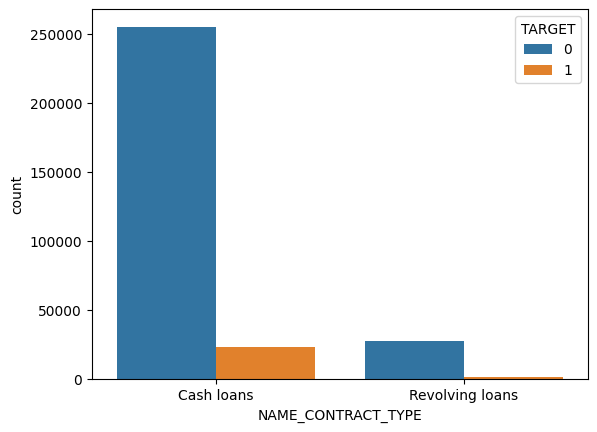

In [71]:
sns.countplot(data=app_score_col_rmvd, x='NAME_CONTRACT_TYPE', hue='TARGET')

In [72]:
app_score_col_rmvd[['NAME_CONTRACT_TYPE','TARGET']].groupby('NAME_CONTRACT_TYPE').mean()

,TARGET
NAME_CONTRACT_TYPE,
Cash loans,0.083459
Revolving loans,0.054783


In [73]:
app_score_col_rmvd['NAME_CONTRACT_TYPE'].shape

(307511,)

In [74]:
app_score_col_rmvd.groupby(['NAME_CONTRACT_TYPE','TARGET'])['NAME_CONTRACT_TYPE'].count()

NAME_CONTRACT_TYPE  TARGET
Cash loans          0         255011
                    1          23221
Revolving loans     0          27675
                    1           1604
Name: NAME_CONTRACT_TYPE, dtype: int64

In [75]:
# Percentage of defaulters on each contract type
data_pct = app_score_col_rmvd.groupby(['NAME_CONTRACT_TYPE'], as_index=False)['TARGET'].mean()
data_pct

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


<details><summary><b>Explanation</b></summary>  

<b>For cash loans</b>  
Total records  = 255,011 (for `TARGET = 0`) + 23,221 (for `TARGET = 1`) = 278,232  
$$\frac {23,221} {278,232} = 0.083459 $$  
  
<b>For revolving loans</b>  
Total records = 27,675 (for `TARGET = 0`) + 1,604 (for `TARGET = 1`) = 29,279  
$$\frac {27,675} {29,279} = 0.054783 $$  
</details>

In [76]:
data_pct['PCT'] = data_pct['TARGET']*100
data_pct

,NAME_CONTRACT_TYPE,TARGET,PCT
0,Cash loans,0.083459,8.345913
1,Revolving loans,0.054783,5.478329


([<matplotlib.patches.Wedge at 0x79e9083a6290>,
 [Text(-0.3521075875625645, 1.0421229518539887, 'Cash loans'),
  Text(0.35210768513315543, -1.0421229188872927, 'Revolving loans')],
 [Text(-0.19205868412503516, 0.5684307010112666, '60.37%'),
  Text(0.19205873734535747, -0.5684306830294323, '39.63%')])

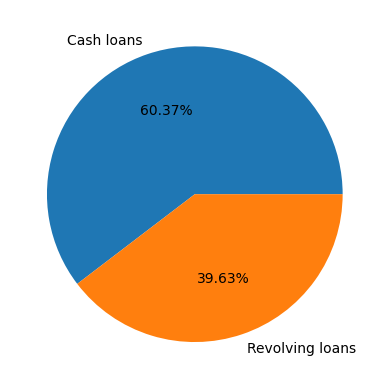

In [77]:
plt.pie(data=data_pct, x='PCT', labels='NAME_CONTRACT_TYPE', autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x79e904b876d0>,
 [Text(-0.3521075875625645, 1.0421229518539887, 'Cash loans'),
  Text(0.35210768513315543, -1.0421229188872927, 'Revolving loans')],
 [Text(-0.19205868412503516, 0.5684307010112666, '60.37%'),
  Text(0.19205873734535747, -0.5684306830294323, '39.63%')])

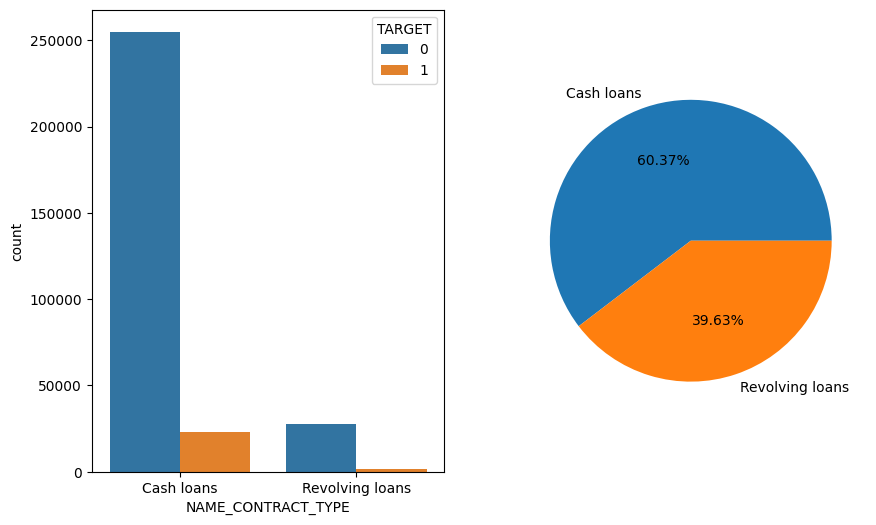

In [78]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd, x='NAME_CONTRACT_TYPE', hue='TARGET')

plt.subplot(1,2,2)
plt.pie(data=data_pct, x='PCT', labels='NAME_CONTRACT_TYPE', autopct='%1.2f%%')

In [82]:
len(obj_var), obj_var

(10,
 Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
        'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
        'ORGANIZATION_TYPE'],
       dtype='object'))

In [83]:
obj_var[:2]

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER'], dtype='object')

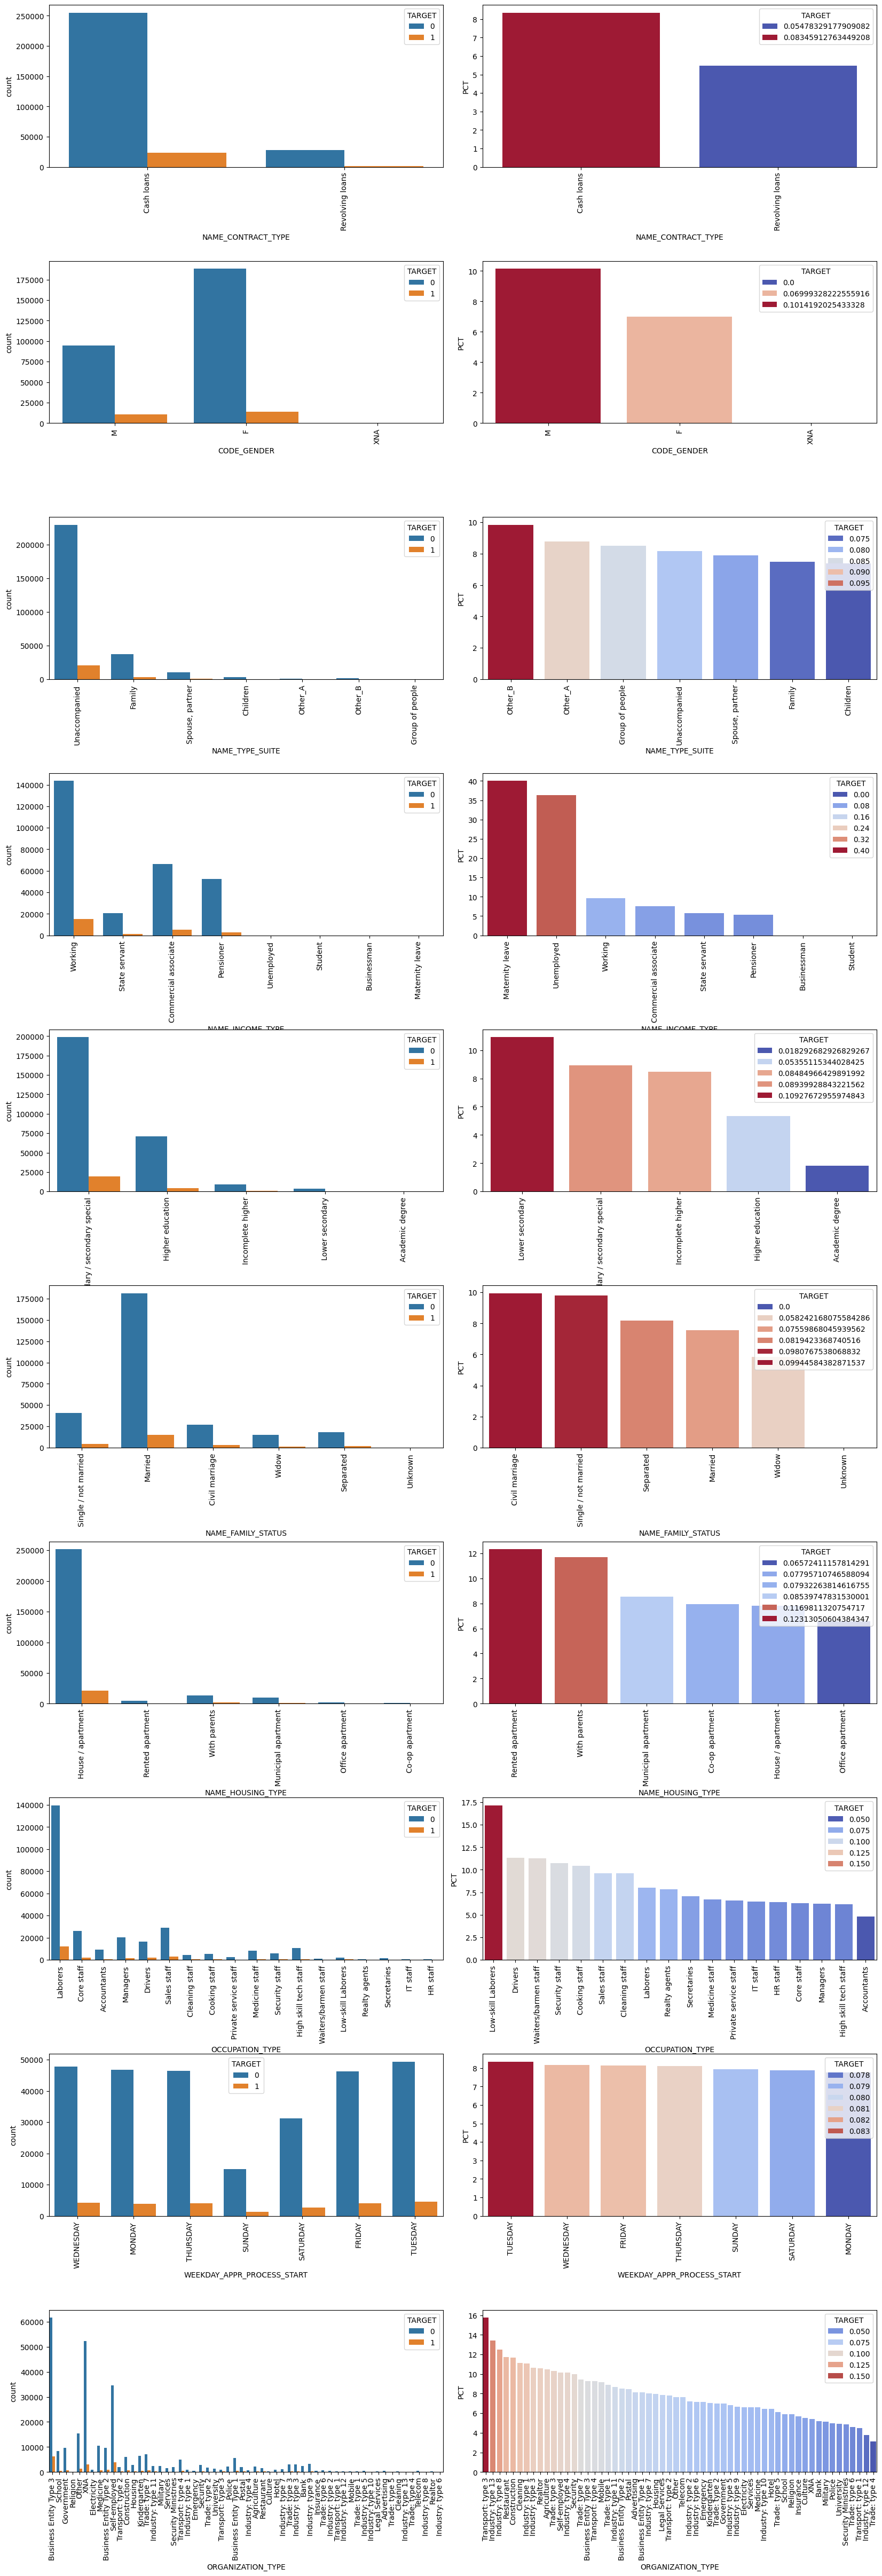

In [98]:
data_pct = app_score_col_rmvd.groupby(['NAME_CONTRACT_TYPE'], as_index=False)['TARGET'].mean()
data_pct['PCT'] = data_pct['TARGET']*100


plt.figure(figsize=(20,60))

for i, var in enumerate(obj_var):
  # print(var, i)
  # print(i+i+1, i+i+2)
  pct = app_score_col_rmvd.groupby(var, as_index=False)['TARGET'].mean() \
        .sort_values(by='TARGET', ascending=False)
  pct['PCT'] = pct['TARGET']*100

  plt.subplot(10,2,i+i+1)
  sns.countplot(data=app_score_col_rmvd, x=var, hue='TARGET')
  plt.xticks(rotation=90)
  plt.subplots_adjust(wspace=.1, hspace=.58) # adjustment btw plots

  plt.subplot(10,2,i+i+2)
  sns.barplot(data=pct, x=var, y='PCT', hue='TARGET', palette='coolwarm')
  plt.xticks(rotation=90)
